# Iris Data Set - Classification
The goal is to predict to which class the plant belongs to. <br>
The data set was downloaded from: https://archive.ics.uci.edu/ml/datasets/Iris . 

Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy.stats as stats

# Load the data

In [2]:
# list of columsn names
columns_names = ['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm','class']
# read the data
iris_data = pd.read_csv('iris.csv', header=None)
# assign columns names list to the data
iris_data.columns = columns_names
iris_data.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: <br/>
    Iris Setosa <br/>
    Iris Versicolour <br/>
    Iris Virginica

# Data describe

In [3]:
iris_data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data info

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Check empty values

In [5]:
iris_data.isnull().sum().sum()

0

As it can be seen the data does not contain missing values.

# Class variable

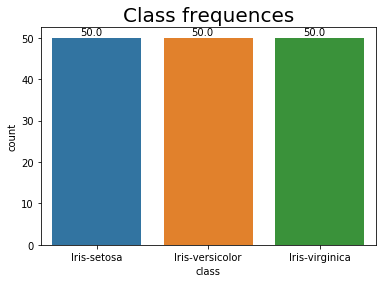

In [6]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(iris_data['class'])
for patch in ax.patches:
    ax.annotate('{:.1f}'.format(patch.get_height()), (patch.get_x()+0.25, patch.get_height()+0.5))
plt.title('Class frequences', fontsize=20)
plt.show()

The chart above shows the distribution of the variable representing classes in the data. <br/>
As it can be seen the dataset has a balanced number of classes. <br/>
Each class has 50 observations.

# Outliers and boxplots

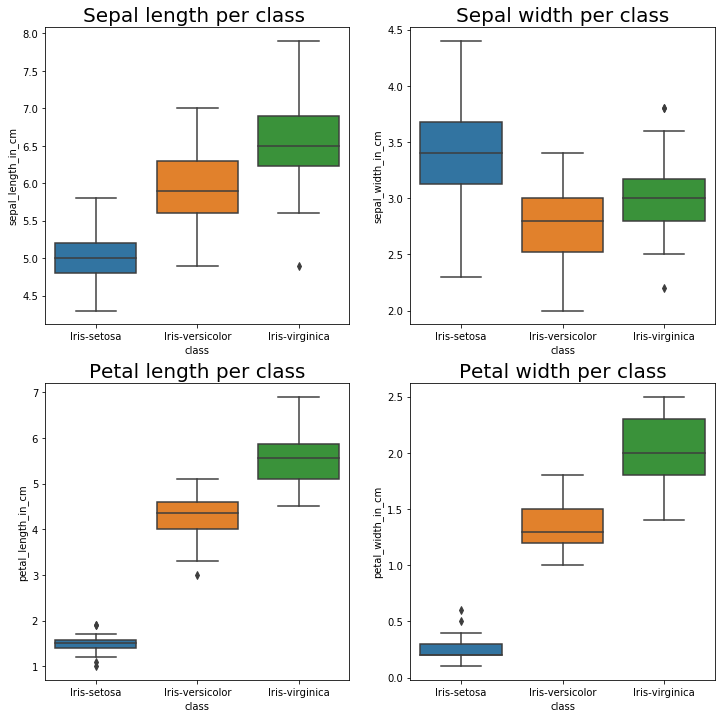

In [7]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax1 = sns.boxplot(y="sepal_length_in_cm", x="class", data=iris_data)
ax1.set_title('Sepal length per class ',fontsize=20)

ax2 = fig.add_subplot(222)
ax2 = sns.boxplot(y="sepal_width_in_cm", x="class", data=iris_data)
ax2.set_title('Sepal width per class',fontsize=20)

ax3 = fig.add_subplot(223)
ax3 = sns.boxplot(y="petal_length_in_cm", x="class", data=iris_data)
ax3.set_title('Petal length per class',fontsize=20)

ax4 = fig.add_subplot(224)
ax4 = sns.boxplot(y="petal_width_in_cm", x="class", data=iris_data)
ax4.set_title('Petal width per class',fontsize=20)
plt.show()

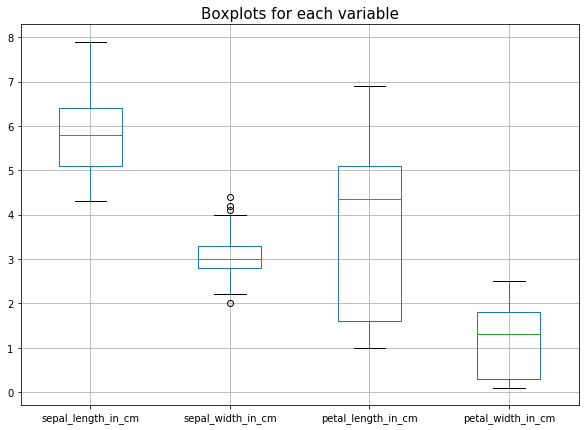

In [8]:
iris_data.boxplot(figsize=(10,7))
plt.title("Boxplots for each variable", fontsize=15)
plt.show()

The chart above represents box plots for each of the variable separately.
It shows that the variable "sepal_with" has several number of outliers.
Other variables do not show any abnormal variables.

Im krótszy wykres tym dane są mniej rozproszone.
Z wykresu powyżej wynika, że wartości zmiennej sepal width są najmniej
rozproszone, a wartości zmiennej petal length są najbardziej rozproszone.
Wykresy zmiennych sepal length i sepal width są najbardziej symetryczne,
wartości są równie rozłożone wokół mediany. 
Pozostałe zmienne posiadają asymetryczny kształt. 
Obie zmienne posiadają asymetrię prawostronną.

In [9]:
def get_outliers(data, column):
    """Returns data frame with outliers.
    data: data frame with data
    column: column name 
    """
    
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    upper_outliers = data[data[column] > upper_bound]
    lower_outliers = data[data[column] < lower_bound]

    frames = [upper_outliers, lower_outliers]
    result = pd.concat(frames)
    return result

In [10]:
outliers_per_class = get_outliers(iris_data, "sepal_width_in_cm")
outliers_per_class

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


The table above shows the values of the outliers. <br/>
It shows that most of the outliers belong to the Iris-setosa class. <br/>

# Histograms

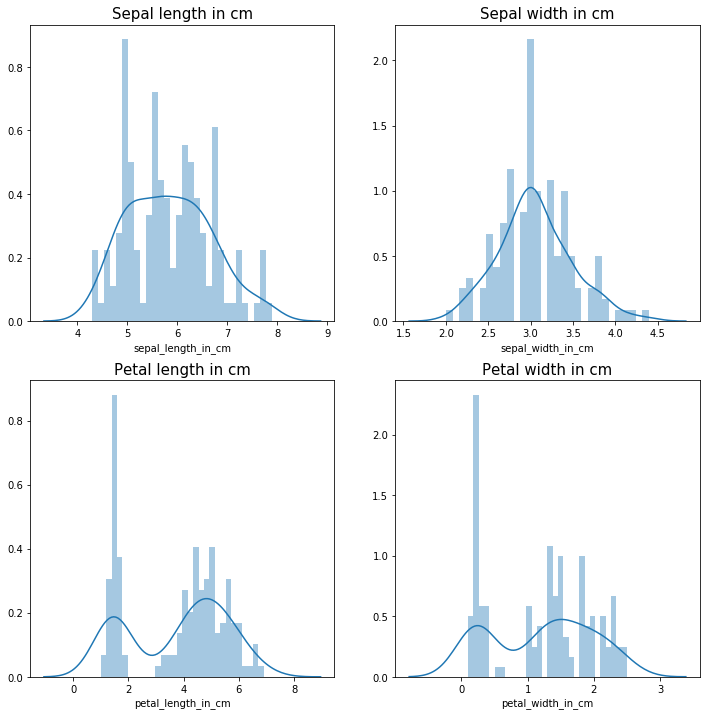

In [11]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax1 = sns.distplot(iris_data["sepal_length_in_cm"], bins=30, kde=True)
ax1.set_title('Sepal length in cm',fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = sns.distplot(iris_data["sepal_width_in_cm"], bins=30, kde=True)
ax2.set_title('Sepal width in cm',fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = sns.distplot(iris_data["petal_length_in_cm"], bins=30, kde=True)
ax3.set_title('Petal length in cm',fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = sns.distplot(iris_data["petal_width_in_cm"], bins=30, kde=True)
ax4.set_title('Petal width in cm',fontsize=15)

plt.show()

The sapal width and sepal length variables are tend to have a distribution close to normal. <br/>

The rest of the variables do not represent this property. 
They are characterized by greater diversity in variable values than others.<br/>

To be more thorough conclusion from the charts can be checked by using, for example, the Shapiro-Wilk test
which is used to test the similarity of the distribution of a given variable to the normal distribution.

# Shapiro-Wilk test for testing data normality

In [12]:
group1 = iris_data["sepal_length_in_cm"]
group2 = iris_data["sepal_width_in_cm"]
group3 = iris_data["petal_length_in_cm"]
group4 = iris_data["petal_width_in_cm"]  

In [13]:
def calculate_shapiro_wilk(*args: any) -> dict:
    """
    Returns data frame with results of Shapiro-Wilk normality test.
    args: separated data frame column names
    """
    
    test_res = []
    p_value = []
    column_names = []
    
    for group in args:
        column_names.append(group.name)
        test, p = stats.shapiro(group)
        test_res.append(test)
        p_value.append(p)    

    data = {
        "columns_names": [group1.name, group2.name, group3.name, group4.name],
        "test_value": test_res, 
        "p_value": p_value
    }
    return data

In [14]:
test_result = calculate_shapiro_wilk(group1, group2, group3, group4)

In [15]:
# create data frame woth results from dictionary
iris_normal_test_df = pd.DataFrame.from_dict(test_result)
iris_normal_test_df["normal_distribution"] = iris_normal_test_df["p_value"] > 0.05
iris_normal_test_df.round(4)

,columns_names,test_value,p_value,normal_distribution
0,sepal_length_in_cm,0.9761,0.0102,False
1,sepal_width_in_cm,0.9838,0.0752,True
2,petal_length_in_cm,0.8764,0.0000,False
3,petal_width_in_cm,0.9026,0.0000,False


The Shapiro-Wilk test test result for normality of variable distribution placed in the table above show that only one variable has a normal distribution. The p-value for petal length and petal width is equal to 0. The sepal length variable has p-value of at level 0.01. For the variable sepal width, p-value is the highest of all - 0.0752.

# Pairplots

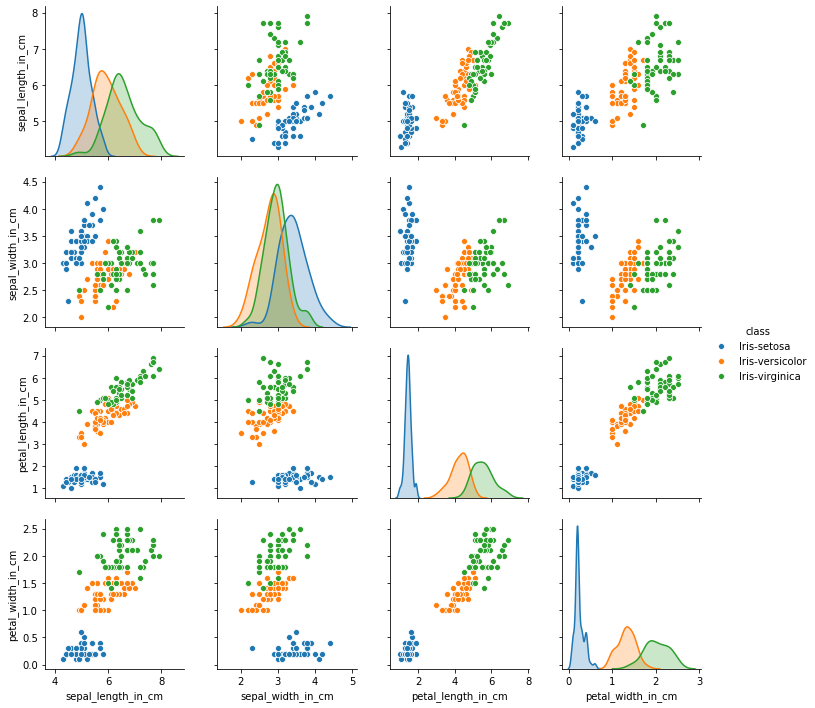

In [16]:
sns.pairplot(data=iris_data, hue="class")
plt.show()

From the graphs above it can be seen that data belonging to the Iris-setosa class differ significantly from the others. <br> 
They can be easily separated from other observations. <br>
It can be assumed that there will be no bigger problem with classifying observations that are belonging to the Iris-setosa kind. <br>
Observations from other classes are mixed with each other to a small extent. <br>
During the attempting to classify observations from other classes, some small erroneous classification attempts may occur. Iris-versicolor observations can be classified as Iris-virginica and vice versa

# Correlation

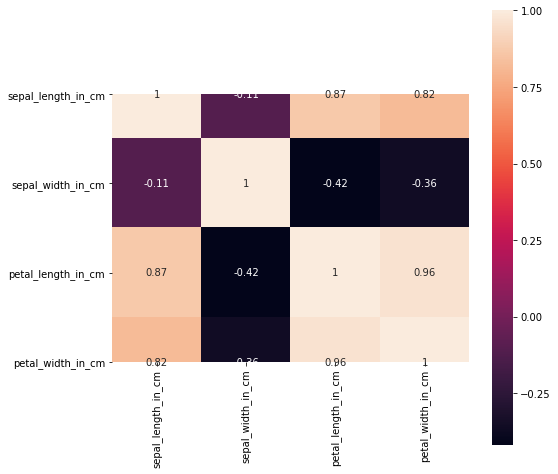

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(iris_data.corr(), annot=True, square=True)
plt.show()

The correlation graph shows that the "sepal_width_in_cm" variable is poorly correlated with all other variables. <br/>
What's more, it is always negatively correlated. <br/>
There is a strong positive correlation (0.87-0.96) between the remaining variables.

# Automation

In [18]:
def print_classification_results(model, X_train, X_test, y_train, y_test, name):
    """
    Returns accuracy score, classification report and confusion matrix for train and test data set.
    arguments:
    model: best estimator
        X_train: X train set
        X_test: X test set
        y_train: y train set
        y_test: y test set
        name: given name of a model
    """
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    model_train_accuracy_score = accuracy_score(y_train, y_pred_train) * 100
    print("Accuracy for TRAIN " + str(name) + " model: %.2f" % model_train_accuracy_score)

    print("TRAIN \n" + classification_report(y_train, y_pred_train))

    model_test_accuracy_score = accuracy_score(y_test, y_pred_test) * 100
    print("Accuracy for TEST " + str(name) + " model: %.2f" % model_test_accuracy_score)

    print("TEST \n" + classification_report(y_test, y_pred_test))
    
    record = [model_train_accuracy_score, model_test_accuracy_score]

    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    conf_mat = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
    heatmap = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Train', fontsize=20)

    plt.subplot(122)
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    heatmap = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Test', fontsize=20)
    plt.tight_layout()
    return record

# Data split

In [19]:
# extract y value from the data set
y = iris_data['class']
X = iris_data.drop(['class'], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)  

# Logistic Regression

In [21]:
logistic_params = {
            'Logistic_regression__penalty':['l2'],
            'Logistic_regression__C': [200, 100, 10, 1, 0.1],
            "Logistic_regression__max_iter": [5, 7, 10, 15],
            "Logistic_regression__solver": ["lbfgs"],
            "Logistic_regression__multi_class": ["multinomial"],
            "Logistic_regression__random_state": [0]
}

pipe = Pipeline([            
                 ('Logistic_regression', LogisticRegression())
                ])

logistic_grid = GridSearchCV(pipe , logistic_params, cv=5, refit=True)
logistic_grid.fit(X_train, y_train)

logistic_best_params = logistic_grid.best_params_
logistic_best_estimator = logistic_grid.best_estimator_

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy for TRAIN logistic_regression model: 98.33
TRAIN 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      0.95      0.97        39
 Iris-virginica       0.95      1.00      0.97        39

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Accuracy for TEST logistic_regression model: 96.67
TEST 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[98.33333333333333, 96.66666666666667]

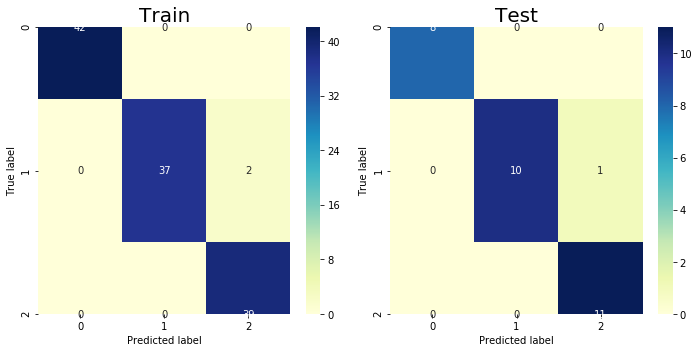

In [22]:
logistic_record = print_classification_results(logistic_best_estimator, X_train, X_test, y_train, y_test, 
                                               "logistic_regression")
logistic_record

# Random Forrest Classifier

In [23]:
random_forest_params = {
    "Random_forest_classifier__max_features": ["sqrt", "log2"],
    "Random_forest_classifier__max_depth": [2,3],
    "Random_forest_classifier__n_estimators": [2,5,7,10],
    "Random_forest_classifier__random_state": [0]
}

pipe = Pipeline([                  
                 ('Random_forest_classifier', RandomForestClassifier())
                ])

rfc_grid = GridSearchCV(pipe , random_forest_params, cv=5, refit=True)
rfc_grid.fit(X_train, y_train)

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Random_forest_classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
 

In [24]:
rfc_best_params = rfc_grid.best_params_
print(rfc_best_params)
rfc_best_estimator = rfc_grid.best_estimator_
print(rfc_best_estimator)

{'Random_forest_classifier__max_depth': 2, 'Random_forest_classifier__max_features': 'sqrt', 'Random_forest_classifier__n_estimators': 5, 'Random_forest_classifier__random_state': 0}
Pipeline(memory=None,
         steps=[('Random_forest_classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=5, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_s

Accuracy for TRAIN random_forest_classifier model: 97.50
TRAIN 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.97      0.96        39
 Iris-virginica       0.97      0.95      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Accuracy for TEST random_forest_classifier model: 90.00
TEST 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.93      0.91      0.91        30
   weighted avg       0.92      0.90      0.90        30



[97.5, 90.0]

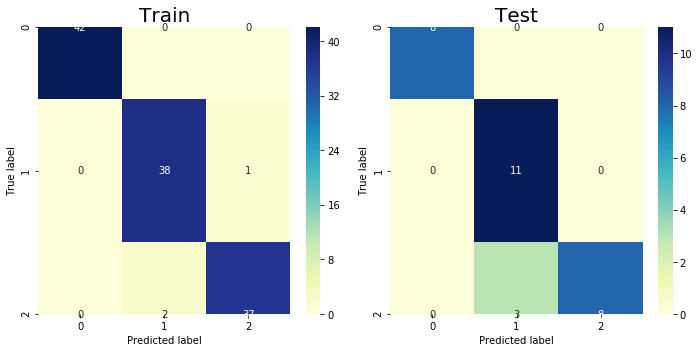

In [25]:
rf_record = print_classification_results(rfc_best_estimator, X_train, X_test, y_train, y_test, 
                                         "random_forest_classifier")
rf_record

# SVC

In [26]:
svc_params = {
    "svc__kernel":['rbf','linear','poly','sigmoid'],
    "svc__degree":[2,3],
    "svc__random_state": [0]
}
pipe = Pipeline([                  
                 ('svc', SVC())
                ])

svc_grid = GridSearchCV(pipe , svc_params, cv=5, refit=True)
svc_grid.fit(X_train, y_train)

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'svc__degree': [2, 3],
                         'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'svc__random_state': [0]},
           

In [27]:
svc_best_params = svc_grid.best_params_
print(svc_best_params)
svc_best_estimator = svc_grid.best_estimator_
print(svc_best_estimator)

{'svc__degree': 2, 'svc__kernel': 'linear', 'svc__random_state': 0}
Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=2,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


Accuracy for TRAIN svc model: 99.17
TRAIN 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      0.97      0.99        39
 Iris-virginica       0.97      1.00      0.99        39

       accuracy                           0.99       120
      macro avg       0.99      0.99      0.99       120
   weighted avg       0.99      0.99      0.99       120

Accuracy for TEST svc model: 96.67
TEST 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[99.16666666666667, 96.66666666666667]

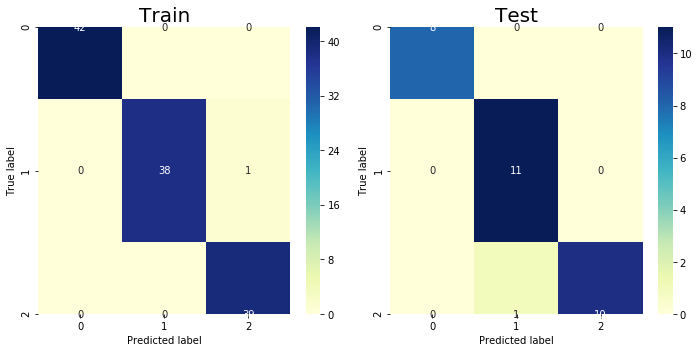

In [28]:
svc_record = print_classification_results(svc_best_estimator, X_train, X_test, y_train, y_test, "svc")
svc_record

# XGBoost Classifier

In [29]:
xgboost_params = {
    'XGBClassifier__max_depth':[2,5,7],
    'XGBClassifier__learning_rate':[0.01,0.03],
    'XGBClassifier__n_estimators':[2,5,7,10,15],
    'XGBClassifier__silent':[0],
    'XGBClassifier__gamma':[0,2,4],
    'XGBClassifier__subsample':[0.30,0.50,0.70],
    'XGBClassifier__random_state': [0]
}
pipe = Pipeline([                  
                 ('XGBClassifier', XGBClassifier())
                ])

xgb_grid = GridSearchCV(pipe , xgboost_params, cv=5, refit=True)
xgb_model = xgb_grid.fit(X_train,y_train)

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
xgb_best_params = xgb_model.best_params_
print(xgb_best_params)
xgb_best_estimator = xgb_model.best_estimator_
print(xgb_best_estimator)

{'XGBClassifier__gamma': 0, 'XGBClassifier__learning_rate': 0.01, 'XGBClassifier__max_depth': 5, 'XGBClassifier__n_estimators': 2, 'XGBClassifier__random_state': 0, 'XGBClassifier__silent': 0, 'XGBClassifier__subsample': 0.5}
Pipeline(memory=None,
         steps=[('XGBClassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None, n_estimators=2,
                               n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=0, subsample=0.5,
                               verbosity=1))],
         verbose=False)


Accuracy for TRAIN xgboost_classifier model: 96.67
TRAIN 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.95      0.95      0.95        39
 Iris-virginica       0.95      0.95      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Accuracy for TEST xgboost_classifier model: 90.00
TEST 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.93      0.91      0.91        30
   weighted avg       0.92      0.90      0.90        30



[96.66666666666667, 90.0]

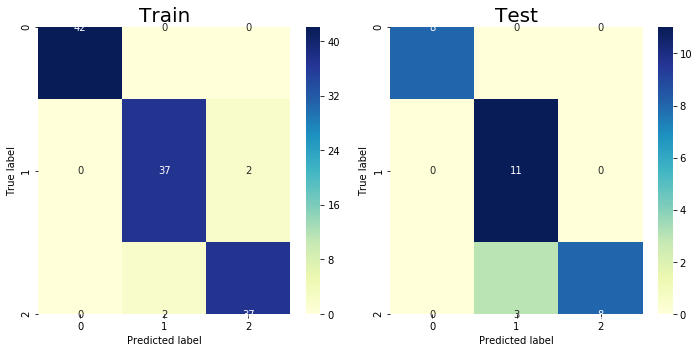

In [31]:
xgb_record = print_classification_results(xgb_best_estimator, X_train, X_test, y_train, y_test, "xgboost_classifier")
xgb_record

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
sgdc_params = {
    "SGDClassifier__penalty": ["l1", "l2"],
    "SGDClassifier__epsilon": [0.8, 0.6, 0.4, 0.2, 0.1],
    "SGDClassifier__eta0": [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01],
    "SGDClassifier__max_iter": [800, 1000, 1200],
    "SGDClassifier__random_state": [0],
    "SGDClassifier__learning_rate": ["constant", "optimal", "invscaling"]

}
pipe = Pipeline([                  
                 ('SGDClassifier', SGDClassifier())
                ])

sgdc_grid = GridSearchCV(pipe , sgdc_params, cv=5, refit=True)
sgdc_model = sgdc_grid.fit(X_train, y_train)

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
sgdc_best_params = sgdc_model.best_params_
print(sgdc_best_params)
sgdc_best_estimator = sgdc_model.best_estimator_
print(sgdc_best_estimator)

{'SGDClassifier__epsilon': 0.8, 'SGDClassifier__eta0': 0.4, 'SGDClassifier__learning_rate': 'invscaling', 'SGDClassifier__max_iter': 800, 'SGDClassifier__penalty': 'l2', 'SGDClassifier__random_state': 0}
Pipeline(memory=None,
         steps=[('SGDClassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.8, eta0=0.4,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='invscaling', loss='hinge',
                               max_iter=800, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=0,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)


Accuracy for TRAIN sgd_classifier model: 95.83
TRAIN 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.93      0.95      0.94        39
 Iris-virginica       0.95      0.92      0.94        39

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120

Accuracy for TEST sgd_classifier model: 93.33
TEST 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



[95.83333333333334, 93.33333333333333]

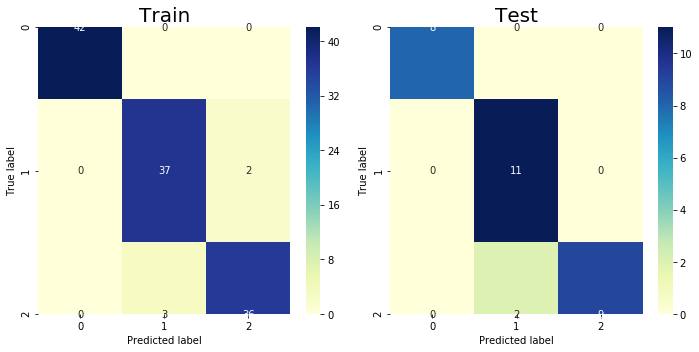

In [35]:
sgdc_record = print_classification_results(sgdc_best_estimator, X_train, X_test, y_train, y_test, "sgd_classifier")
sgdc_record

#  Summary

In [36]:
metrics_dictionary = {
    "Logistic Regression": logistic_record,
    "Random Forest Classifier": rf_record,
    "SVC": svc_record,
    "XGBoost Classifier": xgb_record,
    "SGDClassifier": sgdc_record
}

iris_data_results = pd.DataFrame.from_dict(metrics_dictionary, orient="index",columns=["train_score","test_score"])
iris_data_results.sort_values(by=["test_score","train_score"], ascending=False).round(3)

,train_score,test_score
SVC,99.167,96.667
Logistic Regression,98.333,96.667
SGDClassifier,95.833,93.333
Random Forest Classifier,97.500,90.000
XGBoost Classifier,96.667,90.000
